[Google Drive link to these ZIP files](https://drive.google.com/drive/folders/1W2GPNJ3g5zkHQ3RAaz_S7-arONyKgCNR?usp=sharing)

In [9]:
from counter import counter

In [10]:
cc = counter()

Blank counter with no name


In [ ]:
cc.count(    
    jstor_zip_base = "G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/110 CITATION ANALYSIS/000 data/sociology jstor",
    
    SKIP_N = 10*5 - 1,
    #MAX_N = 100,
    combinations = [
        ('fy','t'),
        ('fj','t'),
        #('fj','fy','t'),
        ('fy',),
        ('t',),
        ('fj',),
    ]
    
)

Will print updated statistics every 20 documents.
Iterating over  248380 documents
Document 0 ... 

Document 20 ... 
	('fy', 't'): shape = (18, 96401), avg[>0] = 2.1, total size = 1.7M
	('fj', 't'): shape = (15, 96401), avg[>0] = 2.1, total size = 1.4M
	('fy',): shape = (18,), avg[>0] = 14708.1, total size = 0.0M
	('t',): shape = (96401,), avg[>0] = 2.8, total size = 0.1M
	('fj',): shape = (15,), avg[>0] = 16809.3, total size = 0.0M


In [5]:
cc(t='social')

22677

In [7]:
# prune a bit before dumping it to disk
to_delete = [t for t in cc.items('t') if cc(t=t) < 50]

cc.delete('t', to_delete)
cc.prune_zeros()

Deleting 1.7M. Leaving 14,297.


In [8]:
cc(t='social')

22677

In [9]:
cc.save_counts('count2-pruned')

# setting date range

In [4]:
cc = counter('count2-pruned')

In [5]:
mny = min(cc.items('fy'))
mxy = max(cc.items('fy'))

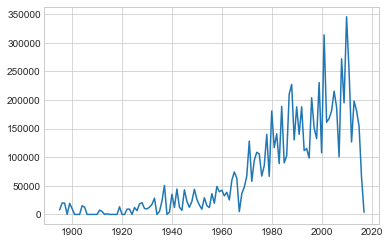

In [8]:
ys = range(mny, mxy+1)
cs = [cc(fy=y) for y in ys]

plt.plot(ys,cs);

# first filter based on number of times each term was mentioned

We want this to be as wide a net we can stand for the next filtering processes.
I cannot keep track of yearly counts of all terms, or even simple term counts (at least, not without dynamic consolidation), because of RAM limitations.
Remember that I'm keeping track of all words, but also all two-word tuples!
So this first stage is only using 1/10 of the documents (see above, SKIP_N).

<!--At this point, subsetting the data now that we have a terms list will not help our memory issue.-->
The term-term coocurrence network uses N^2 integers, which with 1M terms is 1M^2 = 1TB of memory.
If we can limit to ~30,000 terms, approximately the working vocabulary of an adult, this would fit in 1GB of memory.
We can filter by term *dynamics* instead of just relying on .
We can also limit the 1-tuples and 2-tuples independently, reserving 15,000 terms for each.
2-tuples currently make up the majority of our counts, but are not inherently more important than 1-tuples.

In [9]:
#plt.plot([t._dp[y] for y in range(1950,2015)])

In [10]:
target_N = 5000

In [11]:
terms = cc.items('t')
counts = np.array([ cc(t=t) for t in terms ])
cdict = {t:cc(t=t) for t in terms}

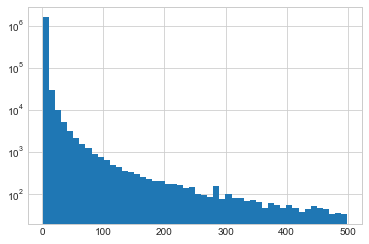

In [12]:
plt.hist(counts[counts<500], bins=50, log=True);

In [13]:
tup1 = [x for x in terms if '-' not in x]
tup2 = [x for x in terms if '-' in x]

In [14]:
tup1_top = sorted(tup1, key=lambda x:cdict[x])[-target_N//2: ]
tup2_top = sorted(tup2, key=lambda x:cdict[x])[-target_N//2: ]

In [15]:
terms_to_keep = tup1_top + tup2_top

In [16]:
import pickle

with open('terms2.pickle', 'wb') as outf:
    pickle.dump(terms_to_keep, outf)

In [28]:
sample( terms_to_keep, 10 )

['younger',
 'order-and',
 'growth',
 'exists',
 'reasoning',
 'concerns',
 'diffusion',
 'model-with',
 'are-different',
 'emphasis-the']

# recount with fuller detail

on my desktop computer this takes way too much time

In [1]:
from counter import counter

In [2]:
import pickle

with open('terms.pickle', 'rb') as inf:
    terms_to_keep = pickle.load(inf)

In [4]:
c = counter()

Blank counter with no name


In [5]:
c.count(    
    jstor_zip_base = "G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/110 CITATION ANALYSIS/000 data/sociology jstor",

    SKIP_N = 50 - 1,
    #MAX_N = 100*100,
    combinations = [
        #('fy','t'),
        #('fj','t'),
        #('fj','fy','t'),
        ('t1', 't2'),
        ('t1', 't2', 'fy'),
        ('fy',),
        ('t',),
        #('fj',),
    ],

    term_whitelist = terms_to_keep,
    WINDOW=250

)

Will print updated statistics every 20 documents.
Iterating over  248380 documents
Document 0 ... 

Document 20 ... 
	('fy',): shape = (18,), avg[>0] = 1630.1, total size = 0.0M
	('t',): shape = (891,), avg[>0] = 31.5, total size = 0.0M
	('t1', 't2'): shape = (891, 891), avg[>0] = 15.5, total size = 0.8M
	('t1', 't2', 'fy'): shape = (891, 891, 18), avg[>0] = 5.5, total size = 14.3M
Document 40 ... 
	('fy',): shape = (33,), avg[>0] = 1913.2, total size = 0.0M
	('t',): shape = (1113,), avg[>0] = 57.6, total size = 0.0M
	('t1', 't2'): shape = (1113, 1113), avg[>0] = 24.2, total size = 1.2M
	('t1', 't2', 'fy'): shape = (1113, 1113, 33), avg[>0] = 5.9, total size = 40.9M
Document 60 ... 
	('fy',): shape = (51,), avg[>0] = 2008.2, total size = 0.0M
	('t',): shape = (1113,), avg[>0] = 86.2, total size = 0.0M
	('t1', 't2'): shape = (1113, 1113), avg[>0] = 33.1, total size = 1.2M
	('t1', 't2', 'fy'): shape = (1113, 1113, 51), avg[>0] = 5.9, total size = 63.2M
Document 80 ... 
	('fy',): shape = 

In [6]:
c.counts[('t',)].sum()

2009487

In [7]:
c.save_counts('count-cooc-2pct-250')

In [ ]:
c2 = counter()

In [ ]:
c2.count(    
    jstor_zip_base = "G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/110 CITATION ANALYSIS/000 data/sociology jstor",

    SKIP_N = 50 - 1,
    #MAX_N = 100*100,
    combinations = [
        #('fy','t'),
        #('fj','t'),
        #('fj','fy','t'),
        ('t1', 't2'),
        ('t1', 't2', 'fy'),
        ('fy',),
        ('t',),
        #('fj',),
    ],

    term_whitelist = terms_to_keep,
    WINDOW=25

)

Will print updated statistics every 20 documents.


In [ ]:
c.save_counts('count-cooc-2pct-25')